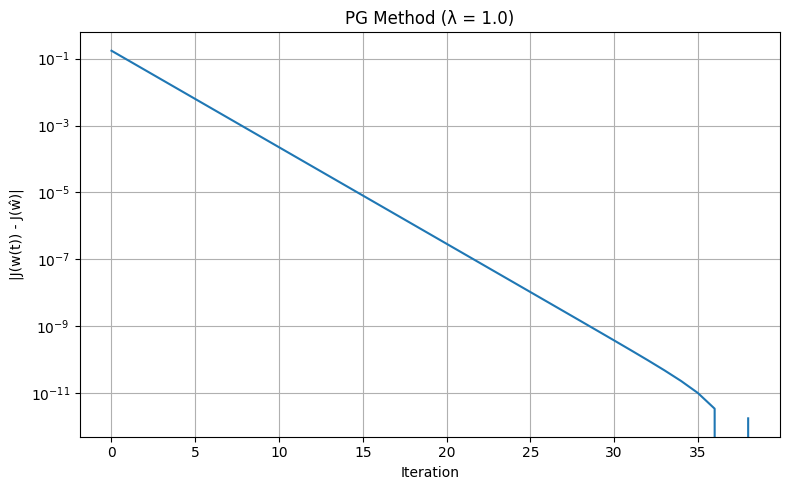

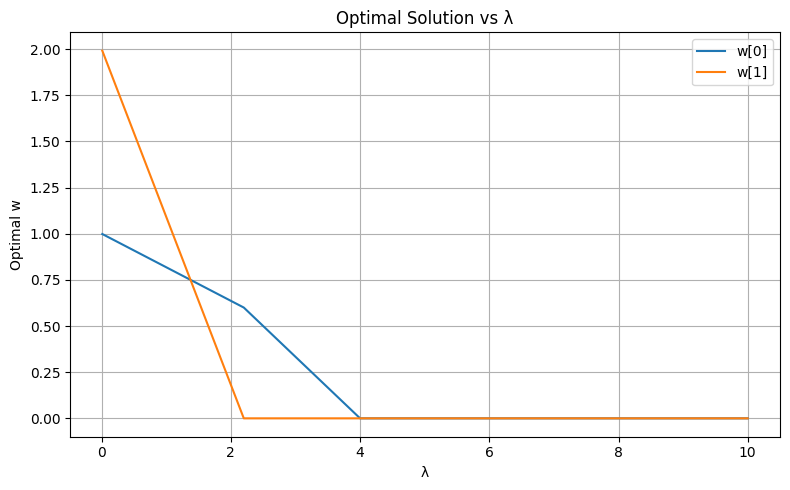

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定義：目的関数 J(w)
def objective(w, A, mu, lam):
    return 0.5 * (w - mu).T @ A @ (w - mu) + lam * np.sum(np.abs(w))

# Proximal Operator (ソフトスレッショルディング)
def soft_thresholding(w, alpha):
    return np.sign(w) * np.maximum(np.abs(w) - alpha, 0)

# PG法の実装
def proximal_gradient(A, mu, lam, eta, max_iter=300, tol=1e-6):
    w = np.zeros_like(mu)
    losses = []

    for _ in range(max_iter):
        grad = A @ (w - mu)
        w_new = soft_thresholding(w - eta * grad, eta * lam)
        loss = objective(w_new, A, mu, lam)
        losses.append(loss)

        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new

    return w, losses

# --- 小問1：lambda = 1.0 における収束グラフ ---
A = np.array([[3, 0.5], [0.5, 1]])
mu = np.array([1.0, 2.0])
lam = 1.0

# 固有値を使ってLipschitz定数L = 最大固有値
L = np.max(np.linalg.eigvals(A))
eta = 1 / L

w_opt, losses = proximal_gradient(A, mu, lam, eta)

# 最小値との差分をsemi-log plot
min_loss = objective(w_opt, A, mu, lam)
errors = [abs(loss - min_loss) for loss in losses]

plt.figure(figsize=(8, 5))
plt.semilogy(errors)
plt.xlabel("Iteration")
plt.ylabel("|J(w(t)) - J(ŵ)|")
plt.title("PG Method (λ = 1.0)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- lambda を 0.01 〜 10.0 で変化させた時の最適解の変化 ---
lambdas = np.concatenate((np.arange(0.01, 1.01, 0.01), np.arange(1.01, 10.01, 0.01)))
w1s, w2s = [], []

for lam in lambdas:
    w_opt, _ = proximal_gradient(A, mu, lam, eta, max_iter=500)
    w1s.append(w_opt[0])
    w2s.append(w_opt[1])

plt.figure(figsize=(8, 5))
plt.plot(lambdas, w1s, label='w[0]')
plt.plot(lambdas, w2s, label='w[1]')
plt.xlabel("λ")
plt.ylabel("Optimal w")
plt.title("Optimal Solution vs λ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


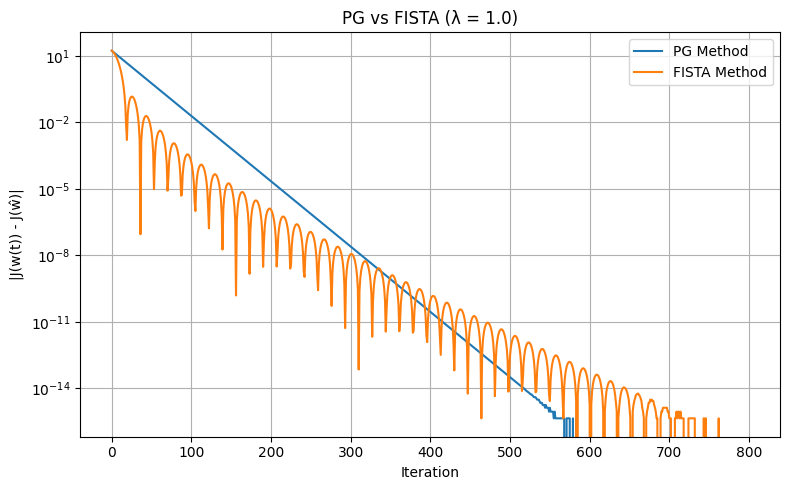

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- 共通の関数 ---
def objective(w, A, mu, lam):
    return 0.5 * (w - mu).T @ A @ (w - mu) + lam * np.sum(np.abs(w))

def soft_thresholding(w, alpha):
    return np.sign(w) * np.maximum(np.abs(w) - alpha, 0)

# --- PG法 ---
def proximal_gradient(A, mu, lam, eta, max_iter=300):
    w = np.zeros_like(mu)
    losses = []
    for t in range(max_iter):
        grad = A @ (w - mu)
        w_new = soft_thresholding(w - eta * grad, eta * lam)
        loss = objective(w_new, A, mu, lam)
        losses.append(loss)
        w = w_new
    return w, losses

# --- FISTA（加速付き近接勾配法）---
def fista(A, mu, lam, eta, max_iter=800):
    w = np.zeros_like(mu)
    v = np.copy(w)
    t = 1
    losses = []
    for k in range(max_iter):
        grad = A @ (v - mu)
        w_new = soft_thresholding(v - eta * grad, eta * lam)
        t_new = (1 + np.sqrt(1 + 4 * t ** 2)) / 2
        v = w_new + ((t - 1) / t_new) * (w_new - w)
        loss = objective(w_new, A, mu, lam)
        losses.append(loss)
        w = w_new
        t = t_new
    return w, losses

# --- 実験設定（小問2）---
A = np.array([[300, 0.5], [0.5, 10]])
mu = np.array([1.0, 2.0])
lam = 1.0

L = np.max(np.linalg.eigvals(A))
eta = 1 / L

# 実行
w_pg, losses_pg = proximal_gradient(A, mu, lam, eta, max_iter=800)
w_fista, losses_fista = fista(A, mu, lam, eta, max_iter=800)

# 基準となる最終損失値
min_loss_pg = losses_pg[-1]
min_loss_fista = losses_fista[-1]

error_pg = [abs(l - min_loss_pg) for l in losses_pg]
error_fista = [abs(l - min_loss_fista) for l in losses_fista]

# --- プロット ---
plt.figure(figsize=(8, 5))
plt.semilogy(error_pg, label='PG Method')
plt.semilogy(error_fista, label='FISTA Method')
plt.xlabel("Iteration")
plt.ylabel("|J(w(t)) - J(ŵ)|")
plt.title("PG vs FISTA (λ = 1.0)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
